In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
def display_basic_info(df):
    print("Primeiras linhas do conjunto de dados:")
    print(df.head())
    print("\nResumo estatístico:")
    print(df.describe())

display_basic_info(df)

Primeiras linhas do conjunto de dados:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Resumo estatístico:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000

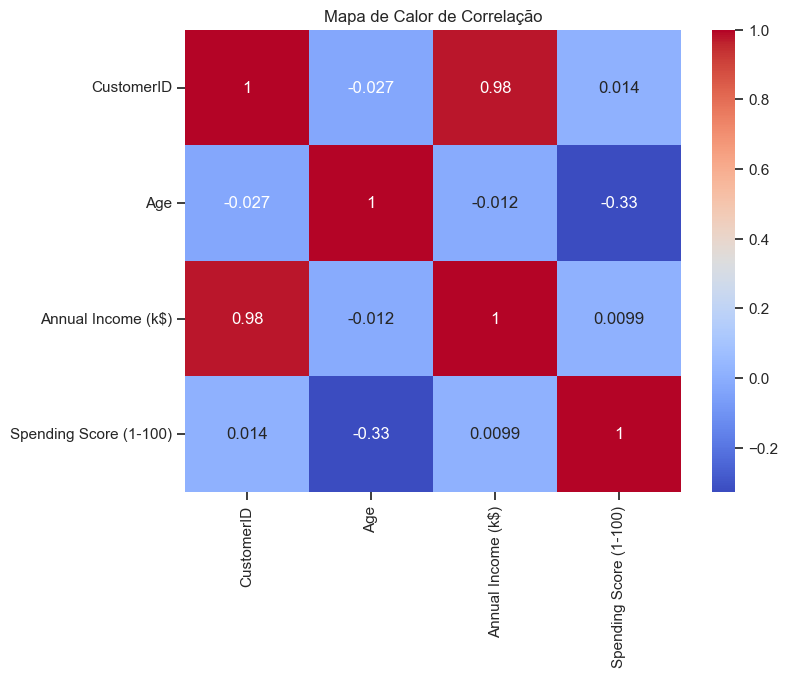

In [10]:
def create_correlation_heatmap(df):
    columns_to_plot = [col for col in df.columns if col != 'Gender']
    corr = df[columns_to_plot].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Mapa de Calor de Correlação")
    plt.show()

create_correlation_heatmap(df)

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categ

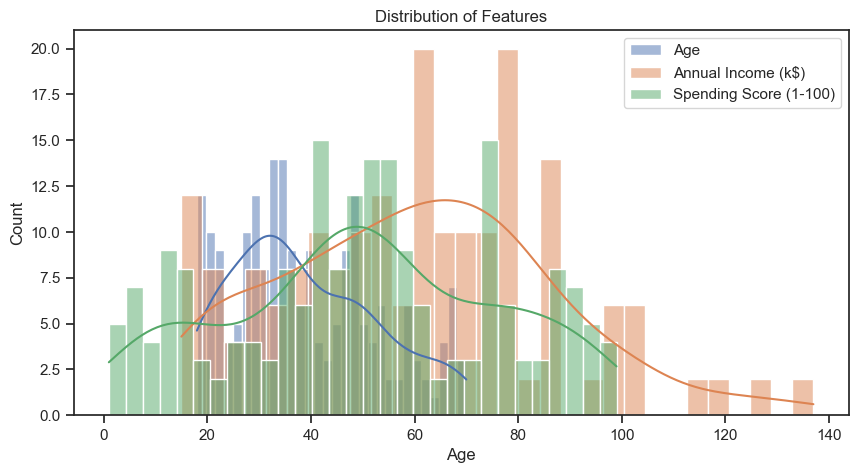

In [11]:
def create_overlapping_histograms(df, columns_to_plot):
    plt.figure(figsize=(10, 5))
    for column_name in columns_to_plot:
        sns.histplot(data=df, x=column_name, kde=True, bins=30, label=column_name)
    plt.title("Distribution of Features")
    plt.legend()
    plt.show()

columns_to_plot = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
create_overlapping_histograms(df, columns_to_plot)

In [12]:
new_column_names = {
    'Spending Score (1-100)': 'Score',
    'Annual Income (k$)': 'Income',
}

df.rename(columns=new_column_names, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df_encoded = pd.get_dummies(df, columns=['Gender'], prefix=['Gender']).astype(int)

In [15]:
def minmax_scaling(df):
    df_normalized = df.copy()
    for column in df.columns:
        if column != 'Score':
            df_normalized[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    return df_normalized

normalized_data = minmax_scaling(df_encoded)
normalized_data.head()

,CustomerID,Age,Income,Score,Gender_Female,Gender_Male
0,0.000000,0.019231,0.000000,39,0.0,1.0
1,0.005025,0.057692,0.000000,81,0.0,1.0
2,0.010050,0.038462,0.008197,6,1.0,0.0
3,0.015075,0.096154,0.008197,77,1.0,0.0
4,0.020101,0.250000,0.016393,40,1.0,0.0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

In [17]:
X = normalized_data.drop(columns=['Score'])
y = normalized_data['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)
rf_mse = mean_absolute_error(y_test, rf_predictions)
print("Random Forest Regressor MAE:", rf_mse)

Random Forest Regressor MAE: 12.725000000000001


C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

In [19]:
# k-Nearest Neighbors (KNN) Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
knn_predictions = knn_regressor.predict(X_test)
knn_mse = mean_absolute_error(y_test, knn_predictions)
print("K-Nearest Neighbors Regressor MAE:", knn_mse)

K-Nearest Neighbors Regressor MAE: 13.905000000000001


C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

In [20]:
# AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor(n_estimators=50, random_state=42)
adaboost_regressor.fit(X_train, y_train)
adaboost_predictions = adaboost_regressor.predict(X_test)
adaboost_mse = mean_absolute_error(y_test, adaboost_predictions)
print("AdaBoost Regressor MAE:", adaboost_mse)

AdaBoost Regressor MAE: 13.562489605416085


C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

In [21]:
import pickle 

model_filename = 'random_forest_regression_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(rf_regressor, file)

print(f"Random Forest Regression Model saved as {model_filename}")

Random Forest Regression Model saved as random_forest_regression_model.pkl
